In [2]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

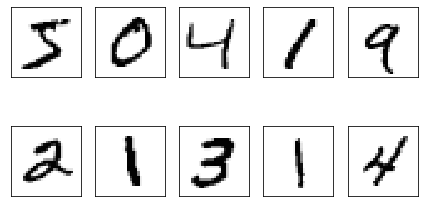

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()


In [6]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 
#model.add(Dense(units=64, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 


In [7]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000000100，即第8個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 
y_TrainOneHot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  


In [9]:
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255


In [10]:
## OOM bug fix
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))  

In [14]:
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)  

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.0823 - accuracy: 0.9777 - val_loss: 0.1067 - val_accuracy: 0.9689
Epoch 2/10
 - 1s - loss: 0.0743 - accuracy: 0.9793 - val_loss: 0.1020 - val_accuracy: 0.9707
Epoch 3/10
 - 1s - loss: 0.0672 - accuracy: 0.9825 - val_loss: 0.1004 - val_accuracy: 0.9708
Epoch 4/10
 - 1s - loss: 0.0608 - accuracy: 0.9840 - val_loss: 0.0965 - val_accuracy: 0.9714
Epoch 5/10
 - 1s - loss: 0.0555 - accuracy: 0.9854 - val_loss: 0.0953 - val_accuracy: 0.9723
Epoch 6/10
 - 1s - loss: 0.0501 - accuracy: 0.9876 - val_loss: 0.0921 - val_accuracy: 0.9734
Epoch 7/10
 - 1s - loss: 0.0462 - accuracy: 0.9884 - val_loss: 0.0892 - val_accuracy: 0.9736
Epoch 8/10
 - 1s - loss: 0.0425 - accuracy: 0.9897 - val_loss: 0.0894 - val_accuracy: 0.9738
Epoch 9/10
 - 1s - loss: 0.0388 - accuracy: 0.9902 - val_loss: 0.0864 - val_accuracy: 0.9740
Epoch 10/10
 - 1s - loss: 0.0354 - accuracy: 0.9918 - val_loss: 0.0852 - val_accuracy: 0.9745


In [15]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


10000/10000 [==============================] - 0s 16us/step

	[Info] Accuracy of testing data = 97.7%


In [16]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


第一層
input = x 有 784 個 -> 即 28 * 28 = 784
output = y 有 256個 迴歸線
y1 = w1x1 + w2x2 + ... + w784x784 + b1
y2 = w2x1 + w2x2 + ... + w2x784 + b2
.
.
.
y256 = w256x1 + w256x2 + ... + w256x784 + b256

故params參數 W 共有 784 256 = 200,960 個
第二層同理

256個 W (權重) + 1 (b常數) 
10個output
params = (256 + 1) * 10 = 2570